In [5]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal, osr
import cartopy.crs as ccrs

from glob import glob

from scipy.interpolate import RectBivariateSpline




import time

In [6]:
### Open rasters

ds = gdal.Open("/home/yad2/sarpixeltracking/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2-F.tif", gdal.GA_ReadOnly)

data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

projcs = inproj.GetAuthorityCode('PROJCS')
raster_projection = ccrs.epsg(projcs)
print(raster_projection)

raster_extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

x_raster = ds.GetRasterBand(1).ReadAsArray()
y_raster = ds.GetRasterBand(2).ReadAsArray()

ds = None



25.58755874633789


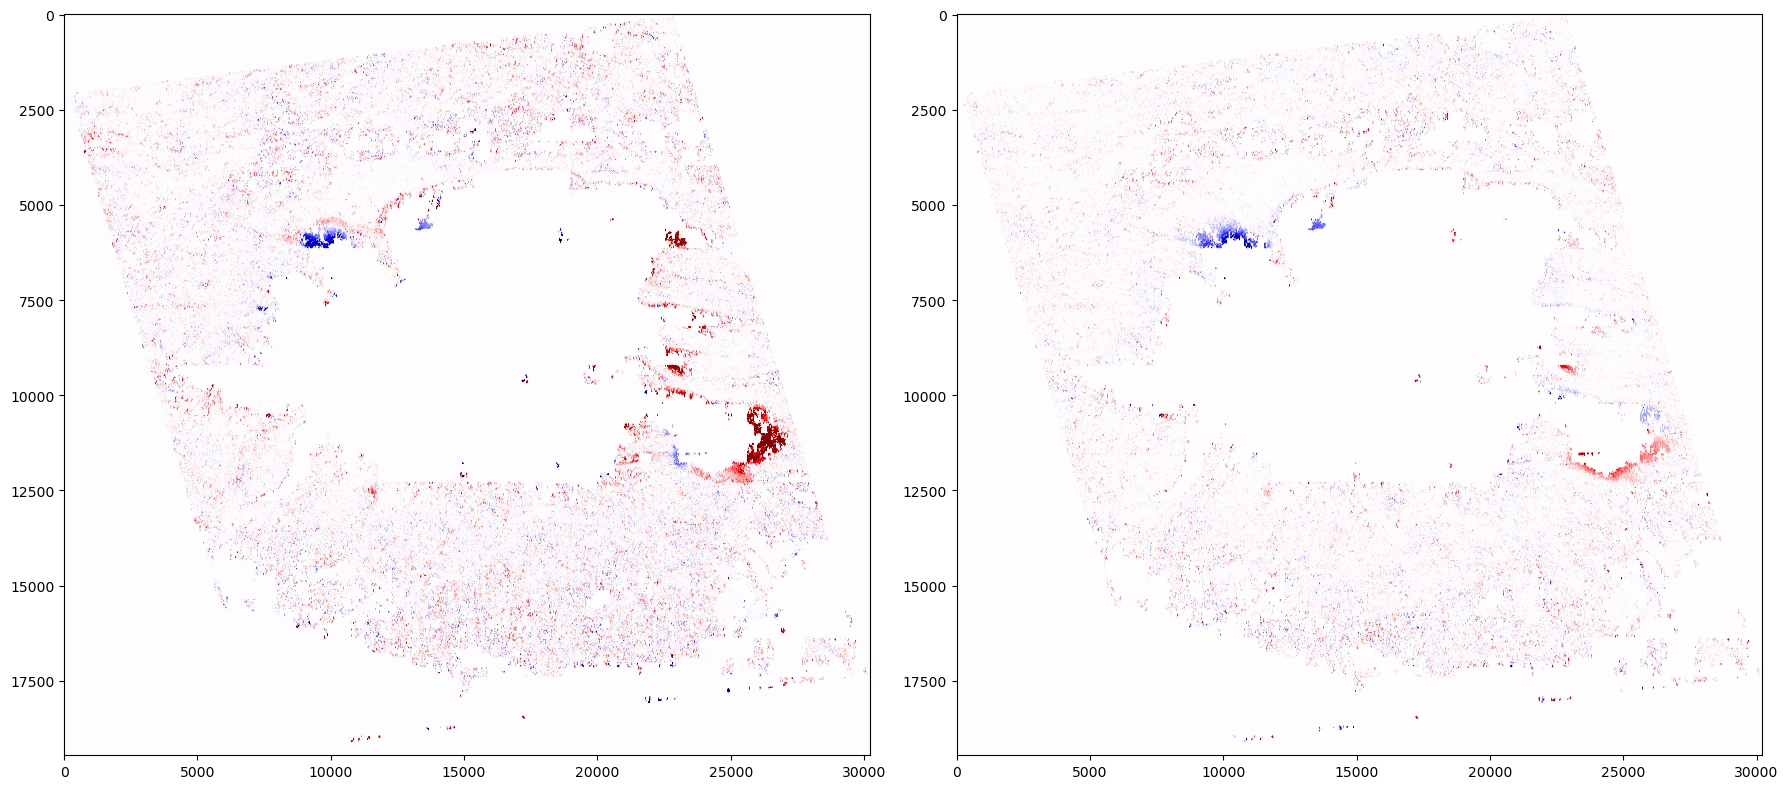

In [5]:
fig = plt.figure(figsize=(18, 8))

minmax = np.max([np.abs(np.max(x_raster)), np.abs(np.min(x_raster)), np.abs(np.max(y_raster)), np.abs(np.min(y_raster))])

minmax = minmax/2

print(minmax)

# display amplitude of the slc
fr1 = fig.add_subplot(1,2,1)

fr1.imshow(x_raster, vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto')

fr2 = fig.add_subplot(1,2,2)

fr2.imshow(y_raster, vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto')

fig.tight_layout()

plt.show()

25.58755874633789


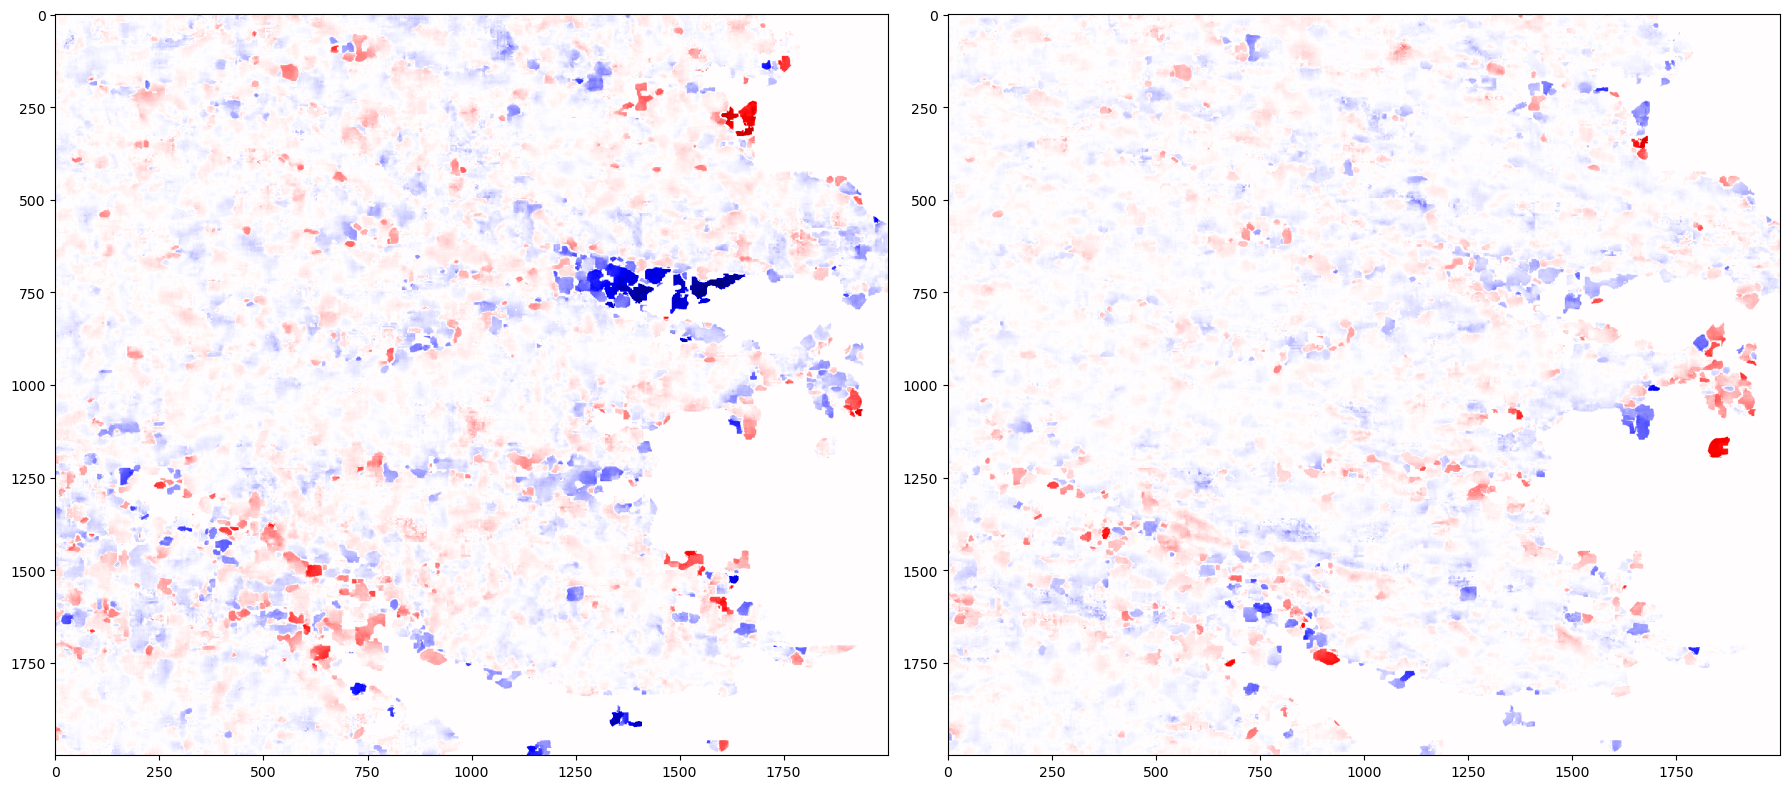

In [11]:
fig = plt.figure(figsize=(18, 8))

minmax = np.max([np.abs(np.max(x_raster)), np.abs(np.min(x_raster)), np.abs(np.max(y_raster)), np.abs(np.min(y_raster))])

minmax = minmax/2

print(minmax)

# display amplitude of the slc
fr1 = fig.add_subplot(1,2,1)

fr1.imshow(x_raster[7000:9000, 6000:8000], vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto')

fr2 = fig.add_subplot(1,2,2)

fr2.imshow(y_raster[7000:9000, 6000:8000], vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto')

fig.tight_layout()

plt.show()

In [4]:
from osgeo import gdal, osr
import cartopy.crs as ccrs

from glob import glob

x_file = glob("/home/yad2/sarpixeltracking/reference*vmap*/reference*F_vx.tif")[0]

print(x_file)

ds = gdal.Open(x_file, gdal.GA_ReadOnly)

# data = ds.ReadAsArray()
# gt = ds.GetGeoTransform()
# proj = ds.GetProjection()

# inproj = osr.SpatialReference()
# inproj.ImportFromWkt(proj)

# print(inproj)

# projcs = inproj.GetAuthorityCode('PROJCS')
# raster_projection = ccrs.epsg(projcs)
# print(raster_projection)

# raster_extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
#           gt[3] + ds.RasterYSize * gt[5], gt[3])

x_raster = ds.GetRasterBand(1).ReadAsArray()

ds = None

y_file = glob("/home/yad2/sarpixeltracking/reference*vmap*/reference*F_vy.tif")[0]

print(y_file)

ds = gdal.Open(y_file, gdal.GA_ReadOnly)

y_raster = ds.GetRasterBand(1).ReadAsArray()

ds = None

m_file = glob("/home/yad2/sarpixeltracking/reference*vmap*/reference*F_vm.tif")[0]

print(m_file)

ds = gdal.Open(m_file, gdal.GA_ReadOnly)


m_raster = ds.GetRasterBand(1).ReadAsArray()

ds = None


reference_file = glob("/home/yad2/sarpixeltracking/reference*vmap*/reference*warp.tif")[0]

print(reference_file)

ds = gdal.Open(reference_file, gdal.GA_ReadOnly)

data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

projcs = inproj.GetAuthorityCode('PROJCS')
raster_projection = ccrs.epsg(projcs)
print(raster_projection)

raster_extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

reference_raster = ds.GetRasterBand(1).ReadAsArray()

ds = None




/home/yad2/sarpixeltracking/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2-F_vx.tif
/home/yad2/sarpixeltracking/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2-F_vy.tif
/home/yad2/sarpixeltracking/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2-F_vm.tif
/home/yad2/sarpixeltracking/reference_20200825_tiled__secondary_20210710_tiled_vmap_minm_35px_spm2/reference_20200825_tiled_warp.tif
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AX

CRSError: Invalid projection: EPSG:None: (Internal Proj Error: proj_create: crs not found)

0.0016726403


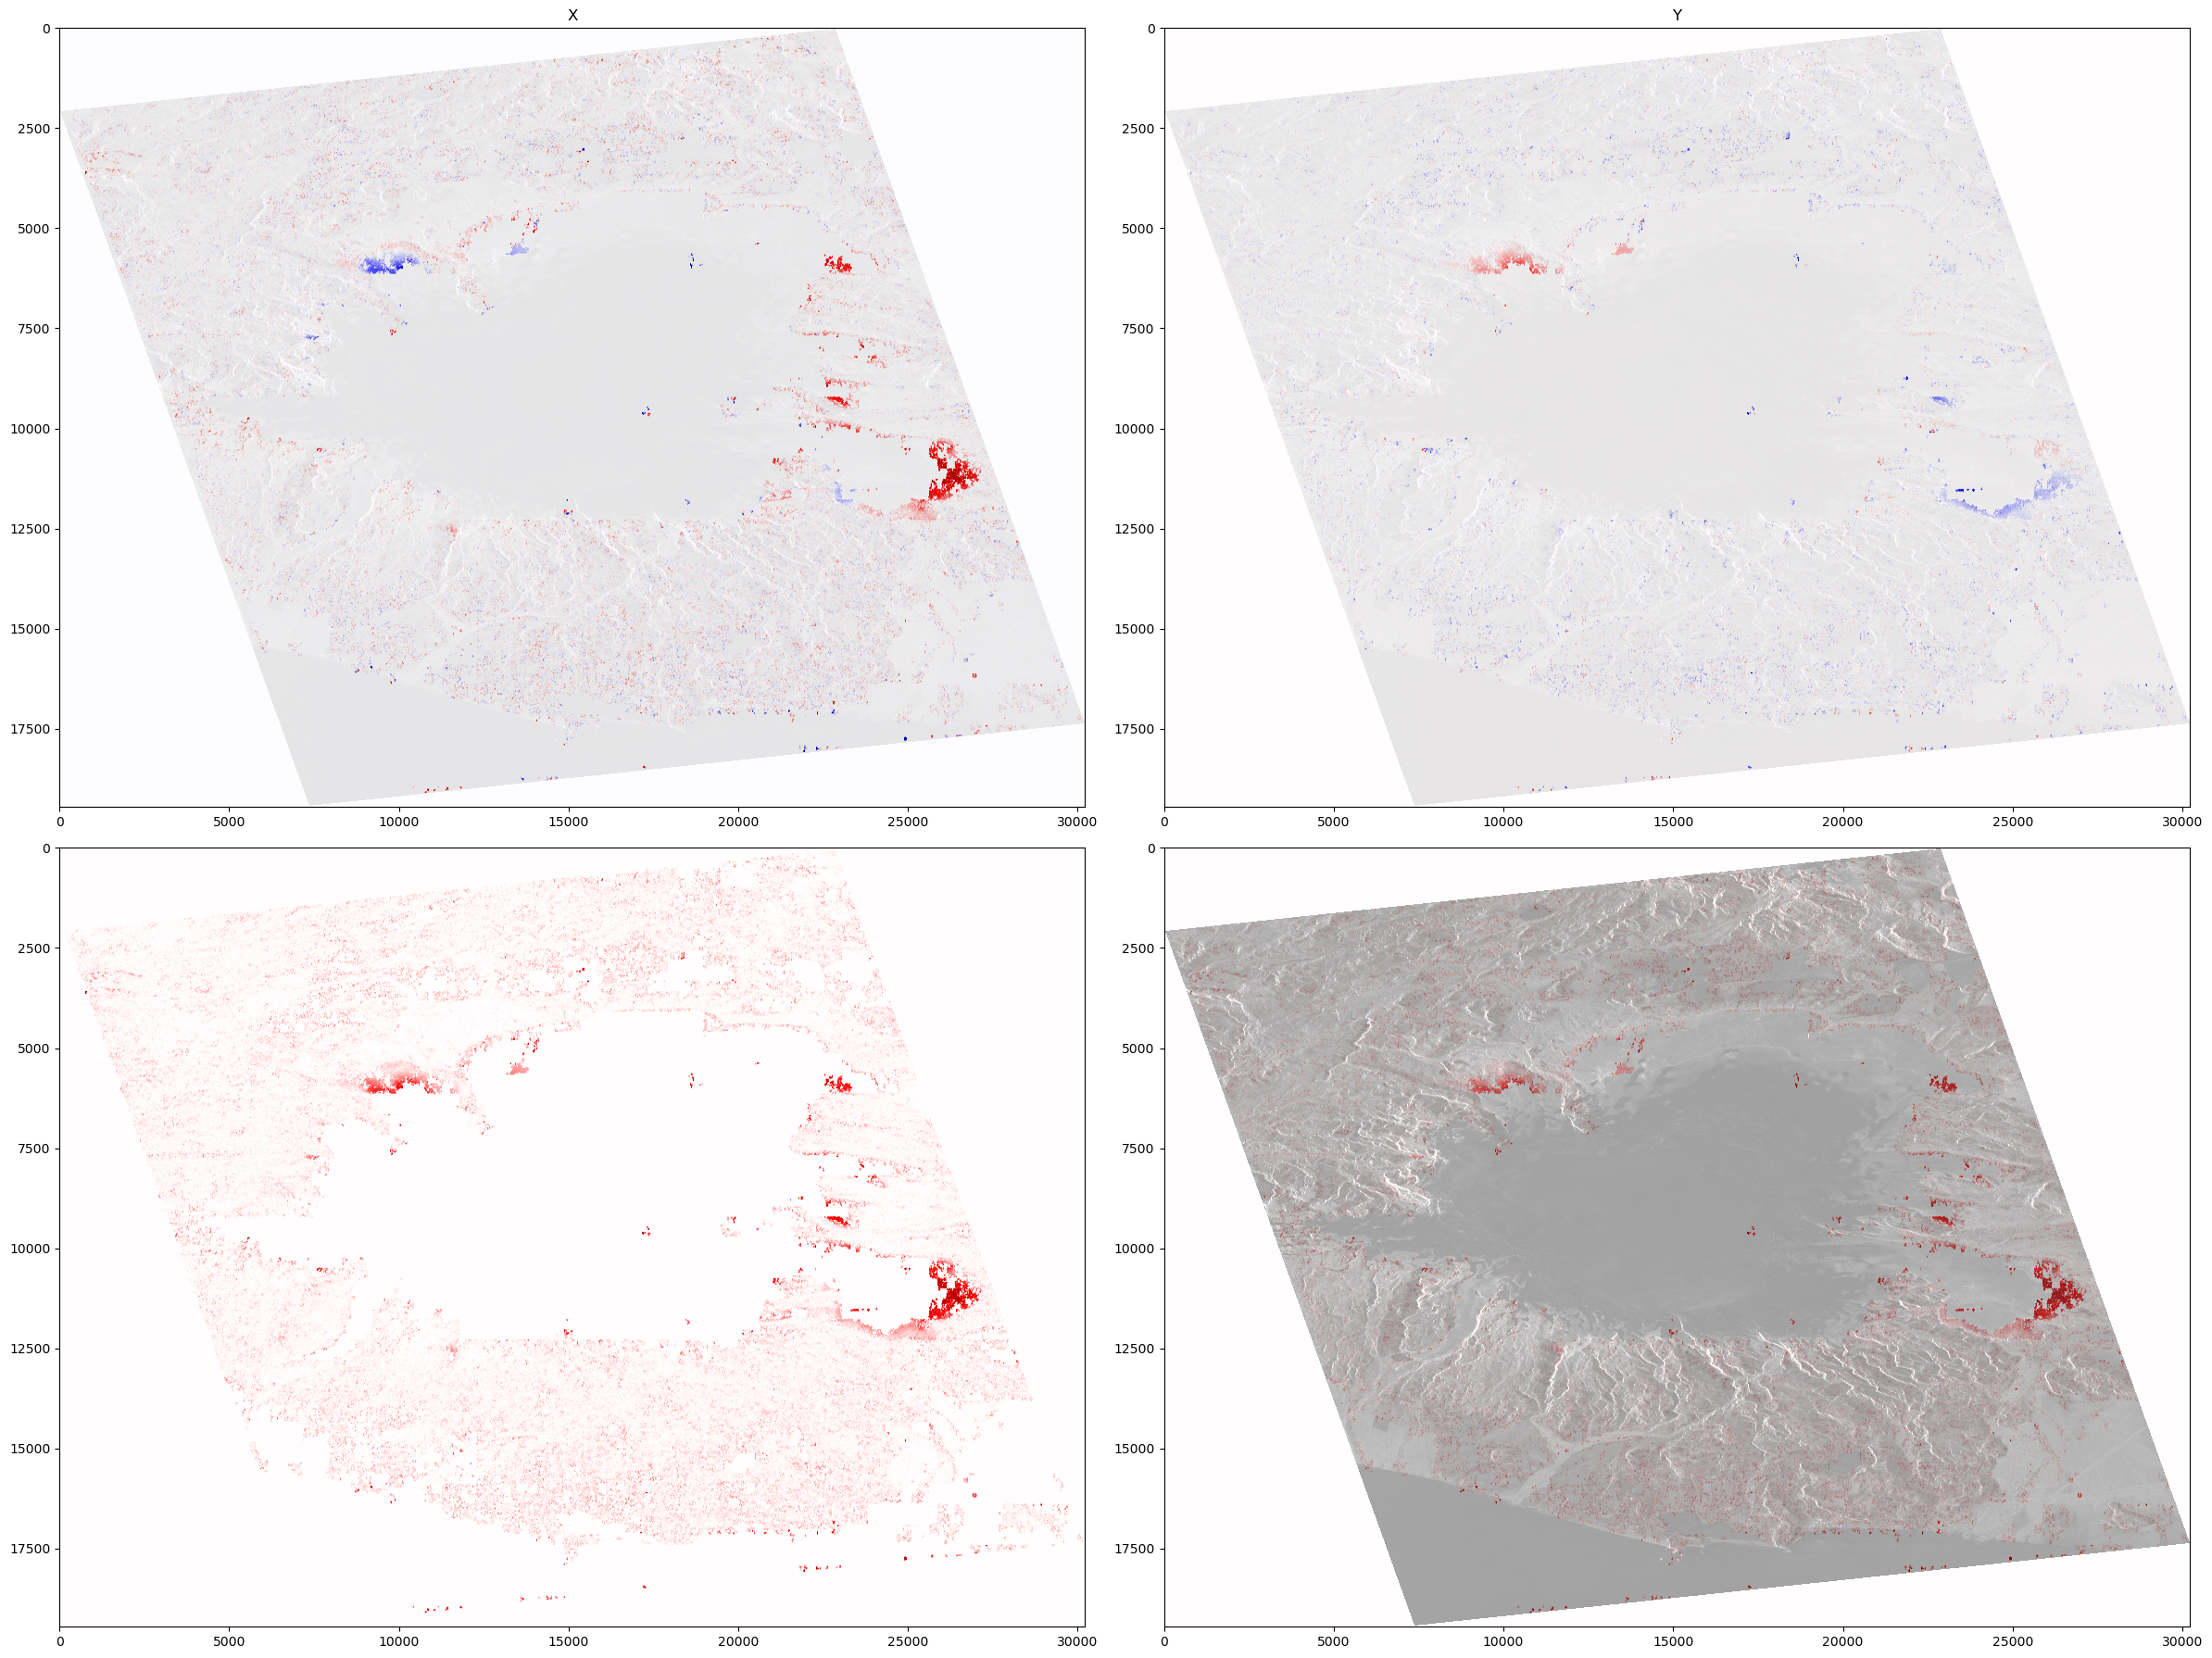

In [22]:
fig = plt.figure(figsize=(24, 18))

minmax = np.max([np.abs(np.max(x_raster)), np.abs(np.min(x_raster)), np.abs(np.max(y_raster)), np.abs(np.min(y_raster))])

minmax = minmax

print(minmax)

# display amplitude of the slc
fr1 = fig.add_subplot(2,2,1)


fr1.imshow(reference_raster, vmax=300, cmap='gray', aspect='auto')

fr1.imshow(x_raster, vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto', alpha=0.9)

fr1.set_title("X")

fr2 = fig.add_subplot(2,2,2)

fr2.imshow(reference_raster, vmax=300, cmap='gray', aspect='auto')

fr2.imshow(y_raster, vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto', alpha=0.9)

fr2.set_title("Y")

fr3 = fig.add_subplot(2,2,3)

fr3.imshow(m_raster, vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto')

fr4 = fig.add_subplot(2,2,4)

fr4.imshow(reference_raster, vmax=300, cmap='gray', aspect='auto')
fr4.imshow(m_raster, vmin=-minmax, vmax=minmax, cmap='seismic', aspect='auto', alpha=0.6)


fig.tight_layout()

plt.show()